req         WARNING 	DEFAULT CACHE ENABLED! (1.04 GB) C:\Users\dilau\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '63', '55', '11', '16', '4', '14', '31', '5', '18', '10', '24', '47', 

['1', '44', '63', '55', '11', '16', '4', '14', '31', '5', '18', '10', '24', '47', '3', '20', '23', '6', '22', '77']
['VER', 'HAM', 'RUS', 'SAI', 'PER', 'LEC', 'NOR', 'ALO', 'OCO', 'VET', 'STR', 'GAS', 'ZHO', 'MSC', 'RIC', 'MAG', 'ALB', 'LAT', 'TSU', 'BOT']
   Driver  Stint Compound  StintLength
0     ALB    1.0     SOFT            2
1     ALB    2.0   MEDIUM           19
2     ALB    3.0   MEDIUM           19
3     ALB    4.0     SOFT           29
4     ALO    1.0   MEDIUM           21
..    ...    ...      ...          ...
57    VET    2.0   MEDIUM           31
58    VET    3.0   MEDIUM           23
59    ZHO    1.0   MEDIUM           27
60    ZHO    2.0     HARD           24
61    ZHO    3.0     SOFT           18

[62 rows x 4 columns]


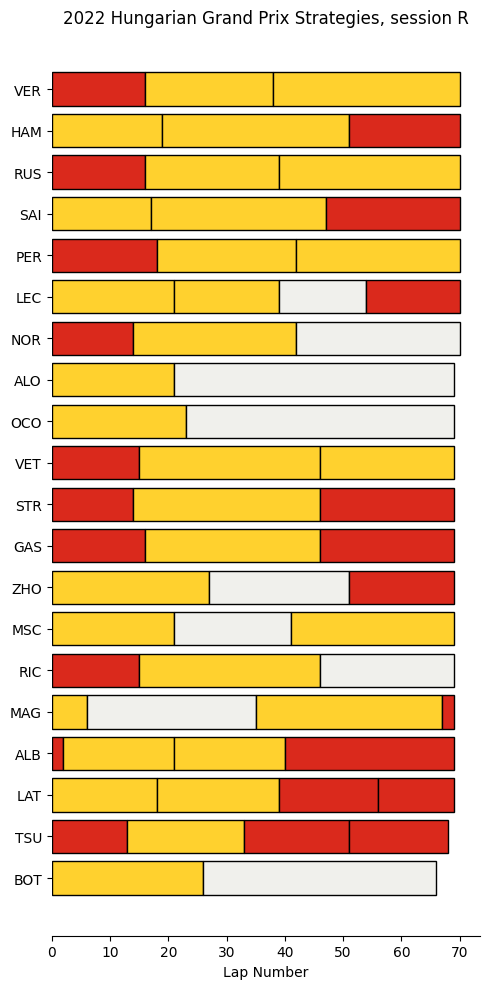

In [1]:
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting

year = 2022
gran_prix = "Hungarian"
sessionG = 'R'  # Race session

session = fastf1.get_session(year, gran_prix, sessionG)
session.load()
laps = session.laps

drivers = session.drivers
print(drivers)

drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
print(drivers)

stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()

stints = stints.rename(columns={"LapNumber": "StintLength"})
print(stints)

fig, ax = plt.subplots(figsize=(5, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        compound_color = fastf1.plotting.get_compound_color(row["Compound"],
                                                            session=session)
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=compound_color,
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]

plt.title(f"{year} {gran_prix} Grand Prix Strategies, session {sessionG}")
plt.xlabel("Lap Number")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

c:\Users\dilau\Desktop\TeamProjF1\fasftF1\.venv\Lib\site-packages\fastf1\plotting\_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
c:\Users\dilau\Desktop\TeamProjF1\fasftF1\.venv\Lib\site-packages\fastf1\plotting\_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(
req         WARNING 	DEFAULT CACHE ENABLED! (1.04 GB) C:\Users\dilau\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data


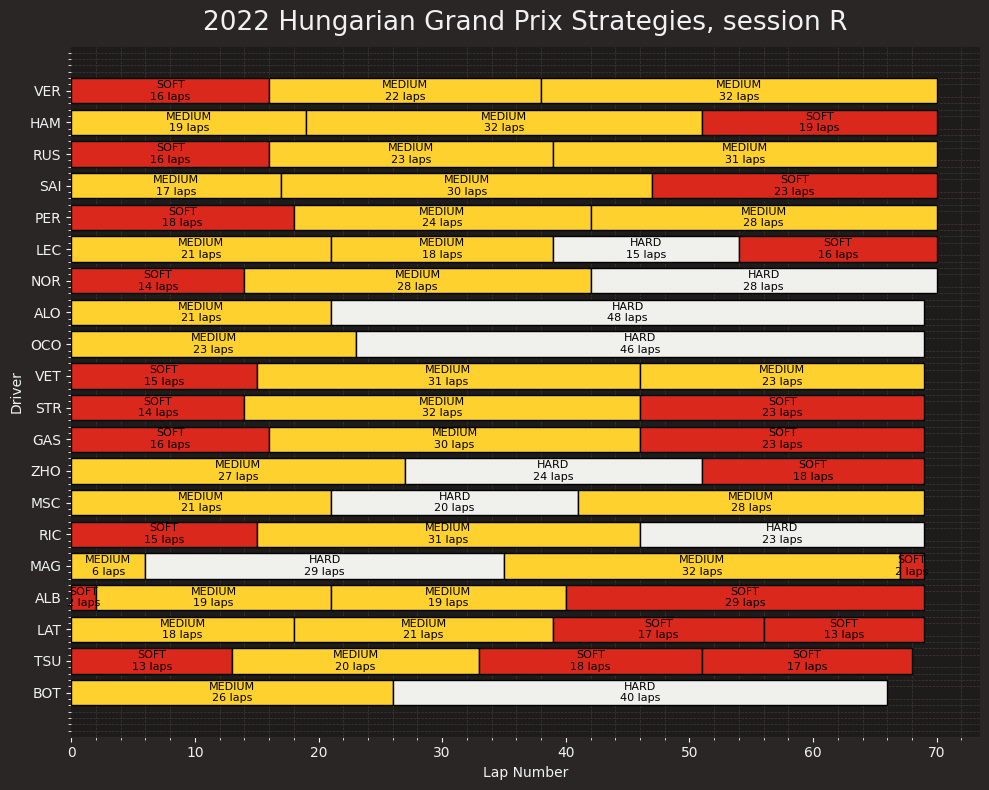

In [1]:
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting

# Enable cache (optional)
# fastf1.Cache.enable_cache('cache')

# Set up FastF1 and Matplotlib
fastf1.plotting.setup_mpl()

# Define the session details
year = 2022
gran_prix = "Hungarian"
sessionG = 'R'  # Race session

# Load the session data
session = fastf1.get_session(year, gran_prix, sessionG)
session.load()

# Get all laps
laps = session.laps

# Get the list of drivers and their abbreviations
drivers = session.drivers
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]

# Prepare stint data
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"]).count().reset_index()
stints = stints.rename(columns={"LapNumber": "StintLength"})

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot stints for each driver
for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # Get the compound color
        compound_color = fastf1.plotting.get_compound_color(row["Compound"], session=session)

        # Plot the stint as a horizontal bar
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=compound_color,
            edgecolor="black",
            fill=True
        )

        # Add text annotation for the compound and stint length
        ax.text(
            x=previous_stint_end + row["StintLength"] / 2,  # Position the text in the middle of the bar
            y=driver,
            s=f"{row['Compound']}\n{row['StintLength']} laps",  # Compound name and stint length
            ha='center',  # Center the text horizontally
            va='center',  # Center the text vertically
            color='black' if compound_color != 'yellow' else 'black',  # Ensure text is readable
            fontsize=8
        )

        previous_stint_end += row["StintLength"]

# Customize the plot
plt.title(f"{year} {gran_prix} Grand Prix Strategies, session {sessionG}")
plt.xlabel("Lap Number")
plt.ylabel("Driver")
plt.grid(False)

# Invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

# Remove unnecessary spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()